# Hurricane Tracks

Inspired by an anomalously active season.

<ipython-input-1-d274cd57b7d7>:4: DtypeWarning: Columns (8,9,25) have mixed types.Specify dtype option on import or set low_memory=False.
  df = ah.tutorial.open_dataset('tc_tracks')


TC TRACKS | Source: IBTrACS v04 - USA | https://www.ncdc.noaa.gov/ibtracs/


/mnt/c/Users/Solactus/GOOGLE~1/Bash/ahlive/ahlive/data.py:428: UserWarning: More than 10 items in legend; setting legend=False; set legend=True to show legend.
  warnings.warn(


[########################################] | 100% Completed |  7min  0.2s



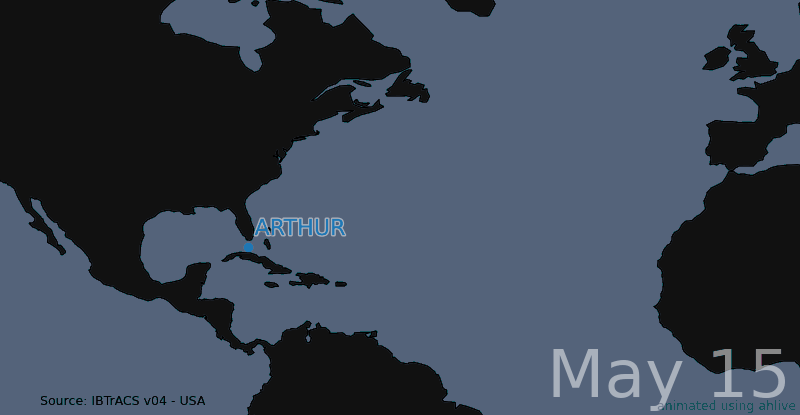

In [1]:
import ahlive as ah

# open and subset 2020 Atlantic hurricanes
df = ah.tutorial.open_dataset('tc_tracks')
df = df.loc[(df['basin'] == 'NA')].loc['2020':]
df = df.groupby('name').resample('1D').agg({
    'lat': 'mean', 'lon': 'mean'})
df = df.reset_index().sort_values(['iso_time', 'name'])

# serialize
ah_df = ah.DataFrame(
    df, 'lon', 'lat', join='cascade', label='name',
    state_labels='iso_time', inline_labels='name',
    figsize=(8, 4.155), chart='scatter', preset='trail',
    projection='PlateCarree', ocean=True, land=True,
    xmargins=1.7, ymargins=0.2, style='bare',
    note='Source: IBTrACS v04 - USA', frames=4,
    scheduler='processes', workers=4
).config(**{
    'preset': {'chart': 'line', 'expire': 5},
    'ocean': {'color': '#54637a'},
    'land': {'color': '#111111'},
    'state': {'color': 'white'}
})

# animate the tracks
ah_df.render()